In [158]:
import random
import matplotlib.pyplot as plt

#### Custom Exception for mismatched size arrays

In [159]:
class ArraySizeException(Exception):
    pass

#### Function to calculate the dot product

In [160]:
def dotProduct(w, data):
    if len(w) != len(data):
        raise ArraySizeException('Mismatched Arrays. Unable to calculate.')
    else:
        total = 0
        for i in range(len(w)):
            product = w[i] * data[i]
            total += product
        return total

#### Class for the Perceptron
Returns the predictions for each of the testData, total no. of errors and the error rate

In [161]:
class Perceptron():
    
    def __init__(self, inputData, label, Z = 0):
        self.inputData = inputData
        self.label = label
        self.Z = Z
        random.seed(0)
        self.w = [random.uniform(-100, 100) for _ in range(len(self.inputData[0]))]
        
        
    def activation(self, result):
        if result >= self.Z:
            return 1
        else:
            return 0                  
        
        
    def train(self, n):        
        for count in range(n):
            for i in range(len(self.inputData)):
                result = dotProduct(self.w, self.inputData[i])

                prediction = self.activation(result)
                    
                for j in range(len(self.w) - 1):
                    self.w[j] += (self.label[i] - prediction) * self.inputData[i][j]
                self.w[len(self.w) - 1] +=  (self.label[i] - prediction)
                
        return self.w
       
    
    def predict(self, testData, testLabel):       
        testPredictions = []
        totalError = 0
        
        for i in range(len(testData)):
            result = dotProduct(self.w, testData[i])
            
            prediction = self.activation(result)
            
            if prediction != testLabel[i]:
                totalError += 1
                
            testPredictions.append(prediction)
            
            errorRate = (totalError / len(testLabel)) * 100
            
        return testPredictions, totalError, errorRate
        

#### Preprocess the data to feed into the perceptron
Splits the data into inputData and label, adds '1' to each inputData for the bias term from the train files

In [162]:
def makeData(filename):

    x = []
    inputData = []
    inputLabel = []
        
    for line in open(filename, "r").readlines():
        dataPoint = line.split(' ')
        x.append([float(dataPoint[0]), float(dataPoint[1])])
        inputLabel.append(float(dataPoint[2]))

    for i in range(len(x)):
        inputData.append([x[i][0], x[i][1], 1])
        
    return x, inputData, inputLabel   

#### Initializations for the files for the input

In [163]:
trainFiles = ['twoclassData/set' + str(i) + '.train' for i in range(1, 11)]

Make test data from the test file

In [164]:
testx, testData, testLabel = makeData('twoclassData/set.test')

#### Perform the training and test on each of the train sets

In [165]:
def trainAndPredict(trainData, trainLabel):
    
    # Initializing and training the perceptron with iterations = 20
    onePerceptron = Perceptron(trainData, trainLabel)
    weights = onePerceptron.train(20)
    
    # Testing the perceptron on the same training data
    trainPredictions, trainError, trainErrorRate = onePerceptron.predict(trainData, trainLabel)
    
    # Testing the perceptron on the test data
    testPredictions, totalError, testErrorRate = onePerceptron.predict(testData, testLabel)
    
    return weights, trainPredictions, testPredictions, testErrorRate

#### Functions to plot the points

In [189]:
# plots a single subplot in the predicted plot
def plotPoints(inputValues, label, plotNumber=plt):
    for j in range(len(inputValues)):
        x_value = inputValues[j][0]
        y_value = inputValues[j][1]
        if label[j] == 0:
            plotNumber.plot(x_value, y_value, 'bo')
        else:
            plotNumber.plot(x_value, y_value, 'ro')

# plots the whole predicted plot from train sets and test set            
def plotPredicted(setnumber, x, w, trainPredictions, trainLabel, testPredictions):
    fig, plots = plt.subplots(1, 2, sharex= True, sharey=True, figsize = (8, 5))
    
    (plot1, plot2) = plots
    
    plotPoints(x, trainPredictions, plot1)
    plot1.set_title('Predicted Train Labels', fontweight='bold')
    
    plotPoints(testData, testPredictions, plot2)
    plot2.set_title('Predicted Test Labels', fontweight='bold')
    
    bYValues = [14, -14]
    bXValues = [((( -w[1] / w[0] ) * bYValues[i]) - ( w[2] / w[0] )) for i in range(2)] 
    
    plot1.plot(bXValues, bYValues, c ='black', lw=2)
    plot2.plot(bXValues, bYValues, c ='black', lw=2)
    
    #plt.subplots_adjust(wspace=0.05)
    plt.suptitle('Train Set ' + str(setnumber), fontsize=16, fontweight='bold')
    plt.tight_layout() 
    plt.show()
    
# plots a single plot for the actual test points
def plotActualTest():
    plt.figure(figsize = (5, 5))
    plotPoints(testData, testLabel)
    plt.suptitle('Actual Test Labels', fontweight='bold')
    plt.tight_layout() 
    plt.show()

#### Train, Predict and Plot the data using the train sets

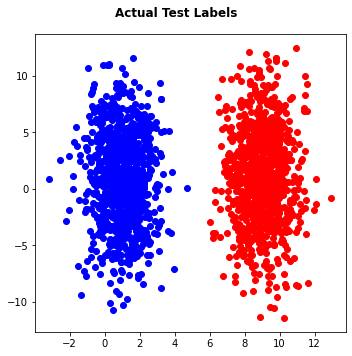

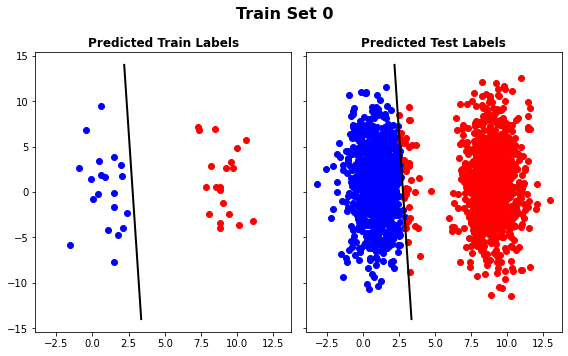

Misclassification Error: 2.1999999999999997 



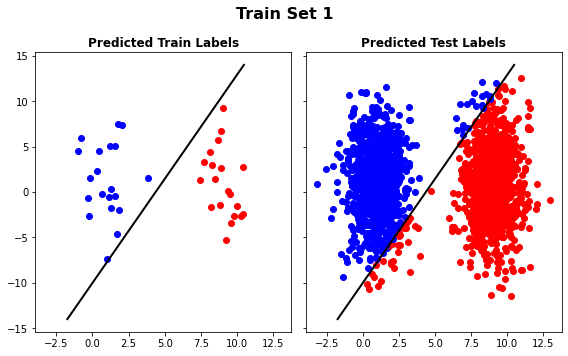

Misclassification Error: 2.55 



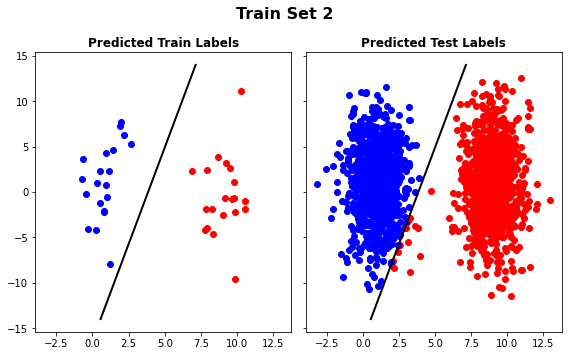

Misclassification Error: 0.65 



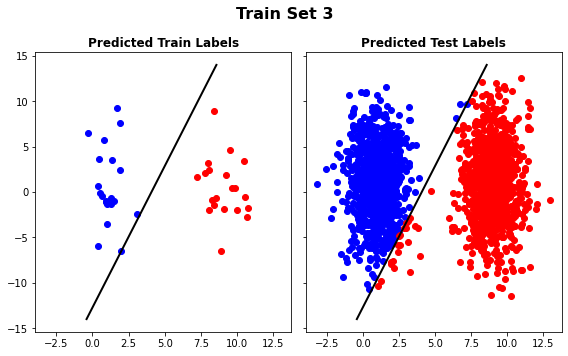

Misclassification Error: 1.25 



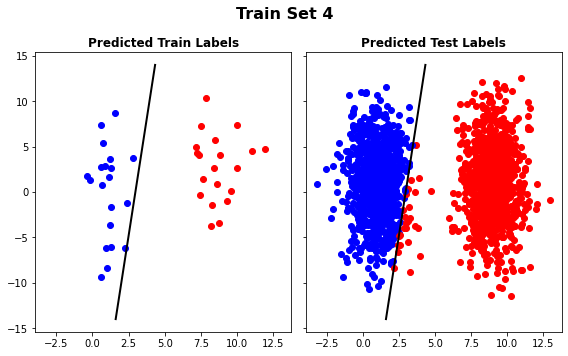

Misclassification Error: 1.3 



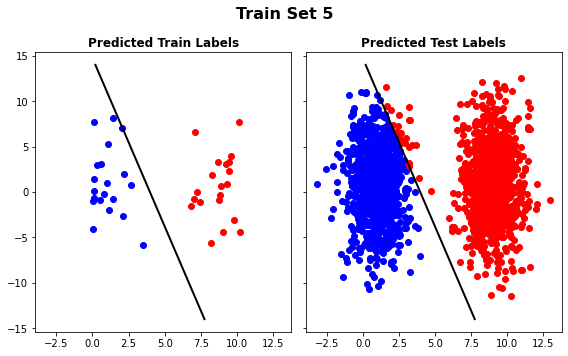

Misclassification Error: 1.55 



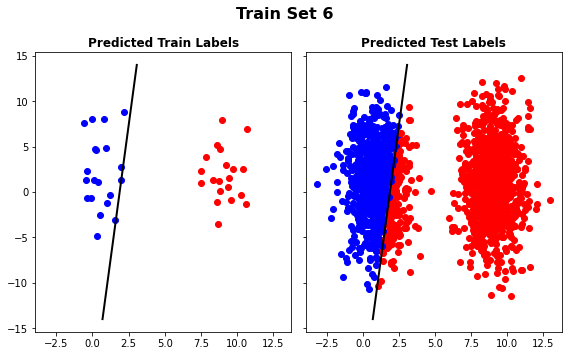

Misclassification Error: 9.5 



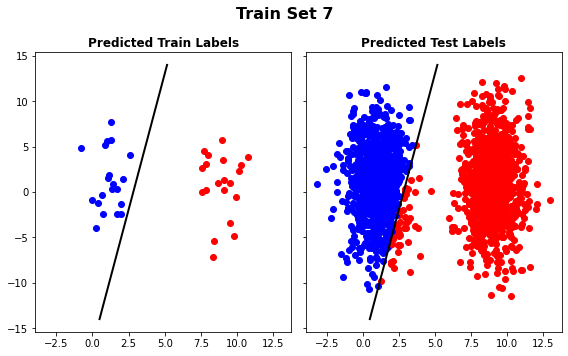

Misclassification Error: 2.35 



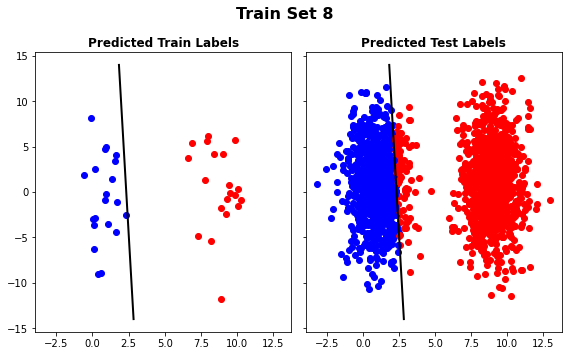

Misclassification Error: 4.75 



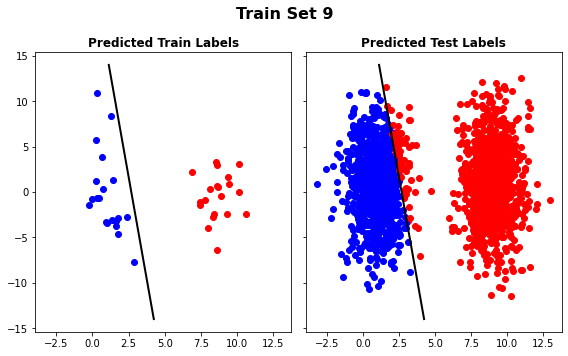

Misclassification Error: 3.75 



In [190]:
print('\n')
plotActualTest()
print('\n')

for i in range(len(trainFiles)):
    # Makes train data from the train files
    x, trainData, trainLabel = makeData(trainFiles[i])
    # trains the perceptron and predicts the test set using the train data 
    weights, trainPredictions, testPredictions, testErrorRate = trainAndPredict(trainData, trainLabel)
    # plots the graphs from the predicted values
    plotPredicted(i + 1, x, weights, trainPredictions, trainLabel, testPredictions)
    # prints the Misclassification Error for the train set
    print('Misclassification Error:', testErrorRate, '\n')